In [36]:
base = '/u/ebanner/Classes/nlp/Project/irony-classifier'

In [ ]:
base = '/u/npockrus/NLP/finalProject/venv/src/irony-classifier'

# Load Subreddits and Labels

In [37]:
cd /{base}/data/conservative/features/text+sentiment+subreddit+label+progressiviness/

/v/filer4b/v20q001/ebanner/Classes/nlp/Project/irony-classifier/data/conservative/features/text+sentiment+subreddit+label+progressiviness


In [38]:
import pickle
import scipy
import numpy as np

with open('features.p', 'r') as f:
    data = pickle.load(f)

subreddits = np.array([data[sentence]['subreddits'] for sentence in sorted(data)])
ys = np.array([ data[sentence]['label'] for sentence in sorted(data) ])

# Frequency Counts

In [39]:
from collections import defaultdict

all = defaultdict(int)
for subreddit_list in subreddits:
    for subreddit in subreddit_list:
        all[subreddit] += 1

In [42]:
import operator

sorted(all.items(), key=operator.itemgetter(1), reverse=True)

[(u'politics', 2748),
 (u'AskReddit', 2231),
 (u'funny', 2197),
 (u'worldnews', 2184),
 (u'pics', 2050),
 (u'videos', 1723),
 (u'WTF', 1668),
 (u'todayilearned', 1622),
 (u'AdviceAnimals', 1466),
 (u'gaming', 1319),
 (u'news', 1280),
 (u'technology', 1264),
 (u'IAmA', 1182),
 (u'atheism', 1170),
 (u'science', 992),
 (u'movies', 914),
 (u'aww', 790),
 (u'conspiracy', 442),
 (u'Frugal', 388),
 (u'JusticePorn', 385),
 (u'Music', 383),
 (u'breakingbad', 357),
 (u'bestof', 316),
 (u'gifs', 293),
 (u'TrueReddit', 280),
 (u'Games', 261),
 (u'Fitness', 258),
 (u'nfl', 229),
 (u'LifeProTips', 224),
 (u'askscience', 218),
 (u'trees', 218),
 (u'PoliticalDiscussion', 212),
 (u'mildlyinteresting', 192),
 (u'books', 185),
 (u'worldpolitics', 179),
 (u'offbeat', 178),
 (u'doctorwho', 175),
 (u'personalfinance', 165),
 (u'geek', 165),
 (u'progressive', 164),
 (u'nyc', 163),
 (u'Economics', 161),
 (u'television', 153),
 (u'socialism', 152),
 (u'MensRights', 150),
 (u'reactiongifs', 145),
 (u'cringepics

# Get Breakdown for Every Subreddit

In [43]:
from collections import defaultdict

ironics = defaultdict(int)
for subreddit_list, y in zip(subreddits, ys):
    if y == 1:
        for subreddit in subreddit_list:
            ironics[subreddit] += 1

In [44]:
genuines = {}
for subreddit in all:
    genuines[subreddit] = all[subreddit] - ironics[subreddit]

In [45]:
for subreddit in all:
    assert genuines[subreddit] + ironics[subreddit] == all[subreddit]

# Number of Subreddits

In [46]:
# Number of Subreddits
N = len(all.items())

# Construct List of Ironic Subreddit Counts

In [52]:
ironic_counts = [ ironics[subreddit] for subreddit in all ][:10]
genuine_counts = [ genuines[subreddit] for subreddit in all ][:10]

[0 1 2 3 4 5 6 7 8 9]


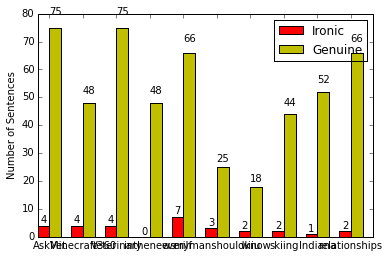

In [57]:
ind = np.arange(10)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
print ind
rects1 = ax.bar(ind, ironic_counts, width, color='r')

rects2 = ax.bar(ind+width, genuine_counts, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Sentences')
ax.set_xticks(ind+width)
ax.set_xticklabels( [ subreddit for subreddit in all ] )

ax.legend( (rects1[0], rects2[0]), ('Ironic', 'Genuine') )

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()